In [1]:
import os
Dir="E:\Fruit360"

In [2]:
os.listdir(Dir)

['archive.zip', 'fruits-360', 'test_small', 'train_small']

In [3]:
train=os.path.join(Dir,"train_small")
test=os.path.join(Dir,"test_small")

In [4]:
os.listdir(train)
os.listdir(test)

['Apricot',
 'Avocado',
 'Banana',
 'Blueberry',
 'Cauliflower',
 'Cocos',
 'Dates',
 'Eggplant',
 'Guava',
 'Lemon']

In [5]:
import tensorflow as tf
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras_preprocessing import image

In [6]:
training_data= ImageDataGenerator(
                    rescale=1./255,
    
                    rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08
)
val_data=ImageDataGenerator(
                    rescale=1./255
                                )

train_dat=training_data.flow_from_directory(
    train,
    target_size=(100,100),
    class_mode='sparse',
    batch_size=25
    
)


test_dat=val_data.flow_from_directory(
    
    test,
    target_size=(100,100),
    class_mode='sparse',
    batch_size=25
)

Found 5003 images belonging to 10 classes.
Found 1679 images belonging to 10 classes.


In [7]:
model=tf.keras.models.Sequential([

        
        tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(100,100,3)),
        tf.keras.layers.MaxPooling2D(2,2),
    
       
        
        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
#     
    
        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),
        
        tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
    
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(10,activation='softmax')
    
        
    
    
    
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 128)       0

In [9]:
lr=1e-4
ep=15
from tensorflow.keras.optimizers import RMSprop

opt=tf.keras.optimizers.Adam(learning_rate=lr)

model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('fruit360modeladam2.model', monitor='val_loss', verbose=1, 
                             save_best_only=True, save_weights_only=False, 
                             mode='auto')

In [11]:
history=model.fit(train_dat,
          epochs=15,
        validation_data = test_dat,
        steps_per_epoch=train_dat.samples//25,
        validation_steps=test_dat.samples//25,
      
        callbacks=[checkpoint]
                  
        
        )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 200 steps, validate for 67 steps
Epoch 1/15
199/200 [============================>.] - ETA: 0s - loss: 0.9208 - accuracy: 0.6648
Epoch 00001: val_loss improved from inf to 0.34941, saving model to fruit360modeladam2.model
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: fruit360modeladam2.model\assets
200/200 [==============================] - 56s 282ms/step - loss: 0.9171 - accuracy: 0.6661 - val_loss: 0.3494 - val_accuracy: 0.9021
Epoch 2/15
199/200 [============================>.] - ETA: 0s - loss: 0.0862 - accuracy: 0.9766
Epoch 00002: val_loss improved from 0.34941 to 0.10339, saving model to fruit360modeladam2.model
INFO:tensorflow:Assets written to: fruit360modeladam2.model\assets
200/200 [==============================] - 21s 106ms/step - loss: 0.0859 - accuracy: 0.9767 - val_loss: 0.1034 - val_accuracy: 0.9510
Epoch 3/15
199/200 [======================

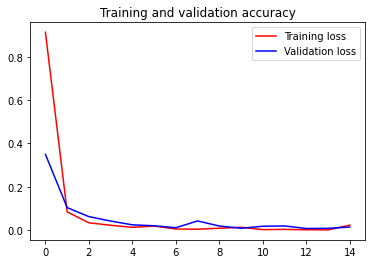

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mapimg


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

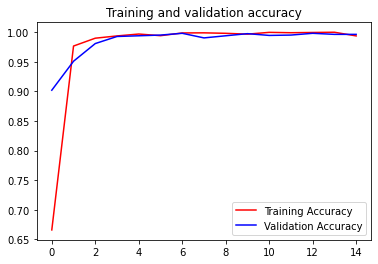

<Figure size 432x288 with 0 Axes>

In [13]:
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

# Testing the model with images which it has seen before 

In [14]:
from keras_preprocessing import image
import numpy as np
model2=tf.keras.models.load_model('fruit360modeladam2.model')

In [19]:
path='cotes.jpg'
img = image.load_img(path, target_size=(100, 100))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(x)

In [20]:
print(classes)
# We get 1 at 5th index which corresponds to coconut

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


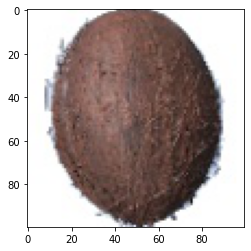

In [21]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [23]:
path='banv.JPG'
img = image.load_img(path, target_size=(100, 100))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(x)

In [25]:
print(classes)
# Gives 1 at 2nd index which corresponds to Banana

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


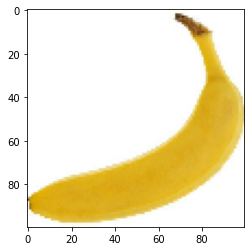

In [26]:
plt.imshow(img)